In [2]:
%matplotlib notebook

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from pyDOE import lhs
from pygmo import fast_non_dominated_sorting as nds
import pandas as pd
import seaborn as sns

In [42]:
known = lhs(2,30) + 1
known = pd.DataFrame(known, columns=["f1","f2"])
known["Type"] = "Dominated"
known["Source"] = "Known Set"
known["Type"][nds(known[["f1","f2"]].values)[0][0]] = "Non-dominated"

/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
nds(known[["f1","f2"]].values)[0][0]

array([ 5,  7, 18, 27], dtype=uint64)

In [85]:
optimistic = np.linspace(0, np.pi/2, 30)
optimistic = np.asarray((-np.sin(optimistic), -np.cos(optimistic))).T + 1.5
optimistic = optimistic + (np.random.rand(*opt.shape) - 0.5)/10
optimistic = pd.DataFrame(optimistic, columns=["f1","f2"])
optimistic["Type"] = "Dominated"
optimistic["Source"] = "Optimistic Set"
optimistic["Type"][nds(optimistic[["f1","f2"]].values)[0][0]] = "Non-dominated"


/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [98]:
data = pd.concat([known, optimistic])
ideal = data[data["Type"]=="Non-dominated"][["f1", "f2"]].min().values
ideal = pd.DataFrame([list(ideal) + ["Ideal", "Global"]], columns =data.columns)
nadir = data[data["Type"]=="Non-dominated"][["f1", "f2"]].max().values
nadir = pd.DataFrame([list(nadir) + ["Nadir", "Global"]], columns =data.columns)

data = pd.concat([data, ideal, nadir])

<IPython.core.display.Javascript object>


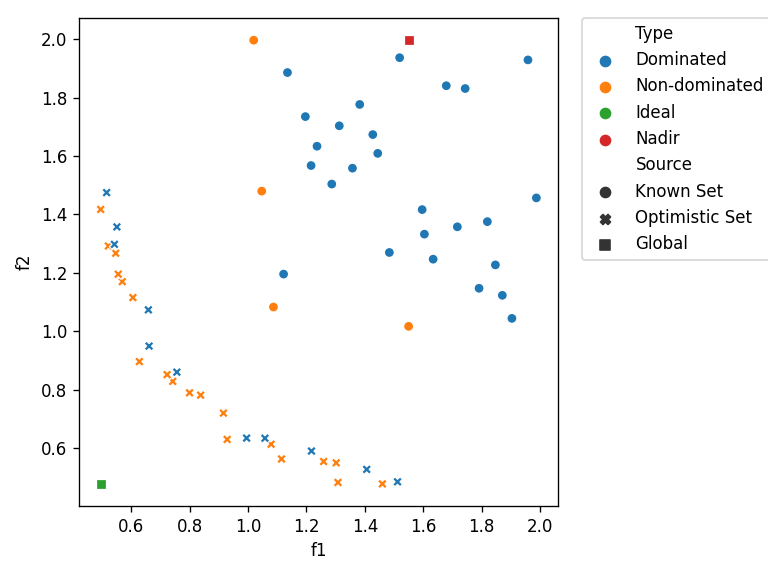

In [239]:
sns.scatterplot(data=data, x="f1", y="f2", hue="Type", style="Source")

plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [173]:
onaut = data[data["Type"]=="Non-dominated"]
bounds = data[data["Source"] =="Global"].reset_index()

<IPython.core.display.Javascript object>


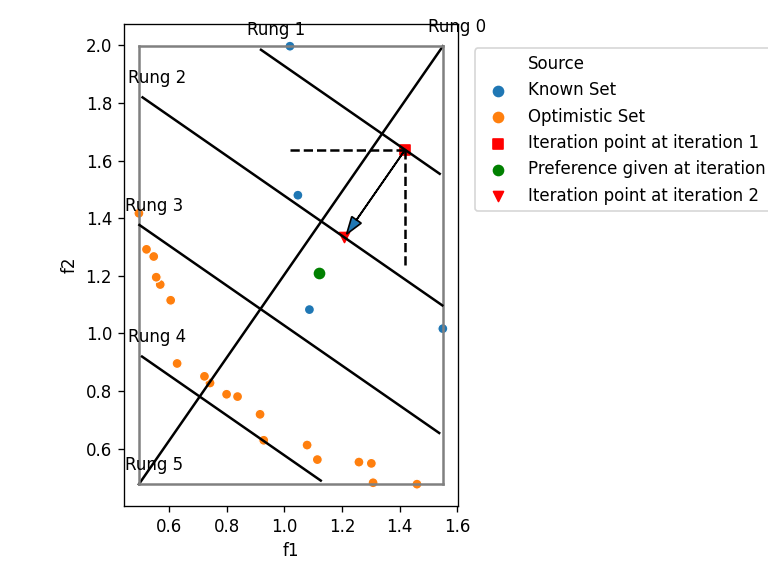

/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/home/rishi/.virtualenvs/O-NAUTILUS/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rishi/.virtualenvs/O-NAUTILUS/lib/

In [328]:
sns.scatterplot(data=onaut, x="f1", y="f2", hue="Source",)
# diag
sns.lineplot(data=bounds, x="f1", y="f2", c="black")
#completing the square
temp = bounds.copy()
temp["f2"][0] = bounds["f2"][1]
sns.lineplot(data=temp, x="f1", y="f2", c="gray")

temp = bounds.copy()
temp["f2"][1] = bounds["f2"][0]
sns.lineplot(data=temp, x="f1", y="f2", c="gray")

temp = bounds.copy()
temp["f1"][0] = bounds["f1"][1]
plt.plot(temp["f1"], temp["f2"], c="gray")

temp = bounds.copy()
temp["f1"][1] = bounds["f1"][0]
plt.plot(temp["f1"], temp["f2"], c="gray")

steps = 5
nadir = bounds[["f1", "f2"]].loc[1]
ideal = bounds[["f1", "f2"]].loc[0]
slope = (nadir - ideal)[1] / (nadir - ideal)[0]
slope = -1/slope
for i in range(steps+1):
    x = np.linspace(-1, 1, 101)
    y = slope * x
    rung = np.asarray((x,y)).T
    center = (i*ideal + (steps-i)*nadir)/steps
    rung = rung + center.values
    rung = rung[np.where(np.any(rung<ideal.values, axis=1)==False)[0],:]
    rung = rung[np.where(np.any(rung>nadir.values, axis=1)==False)[0],:]
    plt.plot(rung[:, 0], rung[:, 1], c="black")
    plt.annotate(f"Rung {i}", xy=rung[0]+np.asarray((-0.05,0.05)),)

    if i == 1:
        iteration_point = rung[25]
        plt.scatter(iteration_point[0], 
                    iteration_point[1], 
                    c="red", marker="s", 
                    label="Iteration point at iteration 1")
        plt.vlines(x=iteration_point[0],
                   ymax=iteration_point[1],
                   ymin=iteration_point[1]-0.4,
                   linestyle="dashed")
        plt.hlines(y=iteration_point[1],
                   xmax=iteration_point[0],
                   xmin=iteration_point[0]-0.4,
                   linestyle="dashed")
    if i == 2:
        new_point = rung[35]
        preference = new_point + (new_point - iteration_point) * 0.41
        plt.scatter(preference[0],
                    preference[1], 
                    c="green", marker="o", 
                    label="Preference given at iteration 1")
        plt.scatter(new_point[0],
                    new_point[1], 
                    c="red", marker="v", 
                    label="Iteration point at iteration 2")
        plt.arrow(iteration_point[0], 
                  iteration_point[1],
                  (new_point[0] - iteration_point[0])*0.8,
                  (new_point[1] - iteration_point[1])*0.8,
                  head_width=0.04)
        


plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2, borderaxespad=0.)
plt.tight_layout()

In [227]:
x = np.linspace(-1, 1, 101)
y = slope * x
rung = np.asarray((x,y)).T
center = (i*ideal + (steps-i)*nadir)/steps
rung = rung + center.values


In [198]:
rung = rung[np.where(np.any(rung<ideal.values, axis=1)==False),:]
rung = rung[np.where(np.any(rung>nadir.values, axis=1)==False),:]

In [230]:
np.where(np.any(rung<ideal.values, axis=1)==False)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [253]:
len(rung)

1

In [257]:
np.random.choice(rung)

ValueError: a must be 1-dimensional

In [258]:
np.random.choice([1])

1

In [262]:
rung[np.random.choice(rung.shape[0])]

array([0.49555359, 0.47724865])

In [278]:
iteration_point[1]

0.4772486457818793

In [277]:
iteration_point[1]-0.2

0.2772486457818793